# Explore here

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [149]:
df = pd.read_csv('/workspaces/pauline---machine-learning-python-template/data/raw/AB_NYC_2019.csv')
pd.set_option('display.max_columns', None)
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [150]:
df.shape

(48895, 16)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [152]:
n_unicos = df.nunique()
n_unicos

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [153]:
#Eliminamos filas con nulos y 0 : 
df_cleaned = df[~(df == 0).any(axis=1)].dropna()

In [154]:
#Elimino la columna host_name: no sirve porque hay varias personas que tienen el mismo nombre, y lo importante es el host_ID 

# df.drop(['host_name'], axis=1, inplace=True) ---> me da error ahora pero porque ya se eliminó lo verificamos con :
df.columns = df.columns.str.strip()
print(df.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [155]:
# Revisamos que no hya fila duplicada:
df.duplicated().sum()

np.int64(0)

In [156]:
#Descripción bsica :
df.describe().T.round(1)


,count,mean,std,min,25%,50%,75%,max
id,48895.0,19017143.2,10983108.4,2539.0,9471945.0,19677284.0,29152178.5,36487245.0
host_id,48895.0,67620010.6,78610967.0,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
latitude,48895.0,40.7,0.1,40.5,40.7,40.7,40.8,40.9
longitude,48895.0,-74.0,0.0,-74.2,-74.0,-74.0,-73.9,-73.7
price,48895.0,152.7,240.2,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.0,20.5,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,23.3,44.6,0.0,1.0,5.0,24.0,629.0
reviews_per_month,38843.0,1.4,1.7,0.0,0.2,0.7,2.0,58.5
calculated_host_listings_count,48895.0,7.1,33.0,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,112.8,131.6,0.0,0.0,45.0,227.0,365.0


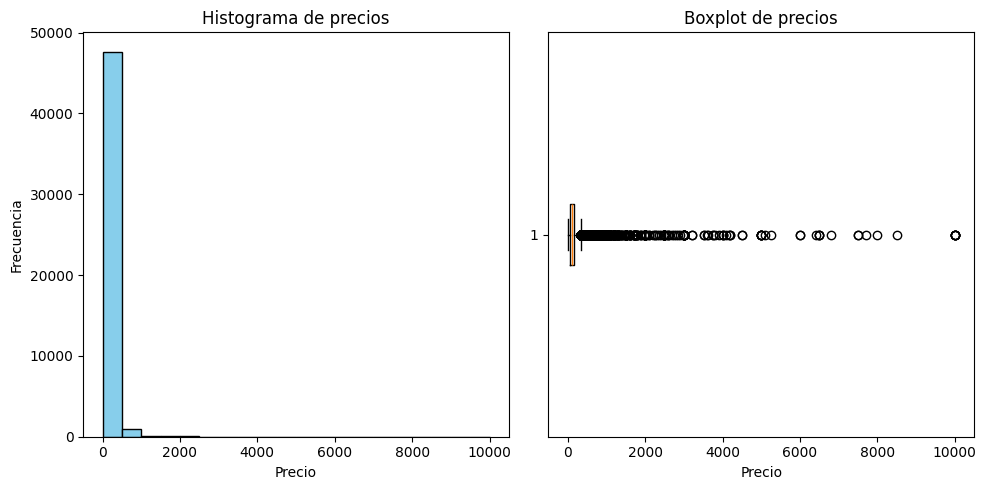

In [157]:
# Estudiamos precios con histogramo y boxplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precios')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de precios')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [164]:
# Transformamos la variable respuesta/dependiente/y/target a escala logarítmica
#Eliminamos negativos en columna price : 

df = df[df['price'] > 0]
df['log_precios'] = np.log(df['price'])

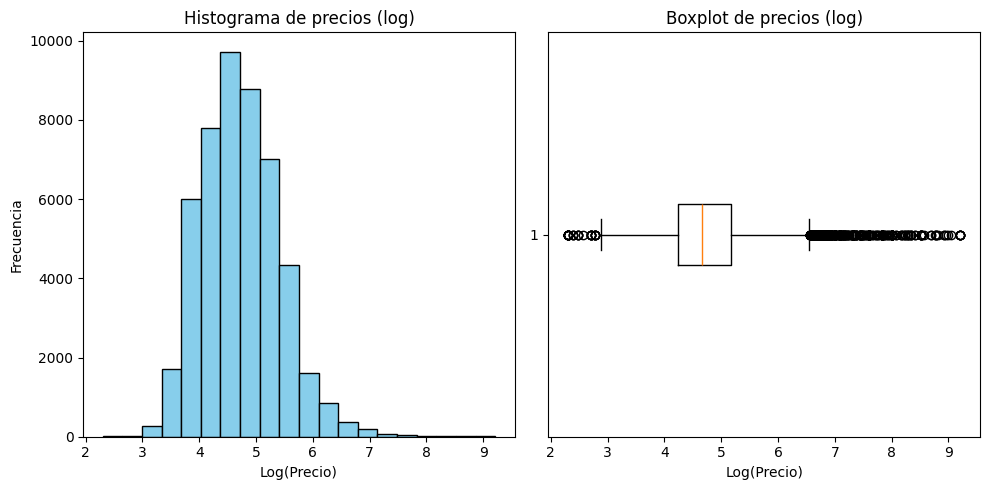

In [163]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['log_precios'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de precios (log)')
ax[0].set_xlabel('Log(Precio)')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['log_precios'], vert=False)
ax[1].set_title('Boxplot de precios (log)')
ax[1].set_xlabel('Log(Precio)')

# Mostrar la figura
plt.tight_layout()
plt.show()